
### CAMBLateDE - Sum of Hyperbolic Tangent
Diogo H. F. Souza, September 20 2024

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
fontsize=13
#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [2]:
zs_5bins = [0.3*(1+i) for i in range(5)]
sigmas   = [0.05, 0.03, 0.01]

commom_params = {"H0": 70, "ombh2":0.02238280, "omch2":0.1201075, "TCMB": 2.7255,
                 "dark_energy_model": 'ppf',
                  "w0": -0.8, "w1": -0.4, "w2": -0.2, "w3": -0.7, "w4": -0.9,
                  "z1":zs_5bins[0], "z2":zs_5bins[1], "z3":zs_5bins[2], "z4":zs_5bins[3], "z5":zs_5bins[4],
                 # Neutrinos
                  "omnuh2": 0, "num_nu_massless": 3.044, "num_nu_massive": 0,
                  "nu_mass_degeneracies": [0], "nu_mass_numbers": [0],
                 # Initial Power Spectrum
                  "As": 2.100549e-09, "ns": 0.9660499, 
                  "YHe": 0.246, "WantTransfer": True}


Binned5_params = camb.set_params(**commom_params, DEmodel= 5)
SumTanh_params = lambda sigma: camb.set_params(**commom_params, DEmodel= 20, sigma=sigma)

In [3]:
scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

Binned5_results = camb.get_results(Binned5_params)
rho_Binned5, w_Binned5 = Binned5_results.get_dark_energy_rho_w(scale_factor)

def w_rho_res_SumTanh(sigma):
    SumTanh_results = camb.get_results(SumTanh_params(sigma))
    rho_SumTanh, w_SumTanh = SumTanh_results.get_dark_energy_rho_w(scale_factor)
    return rho_SumTanh, w_SumTanh, SumTanh_results

In [4]:
x = [0]+[eval(f"Binned5_results.Params.DarkEnergy.z{i+1}") for i in range(5)] + [10] # 10 is arbitrary - just choose a high redshift to support w = -1
y = [eval(f"Binned5_results.Params.DarkEnergy.w{i}") for i in range(5)] + [-1]    

(0.1, 3.0)

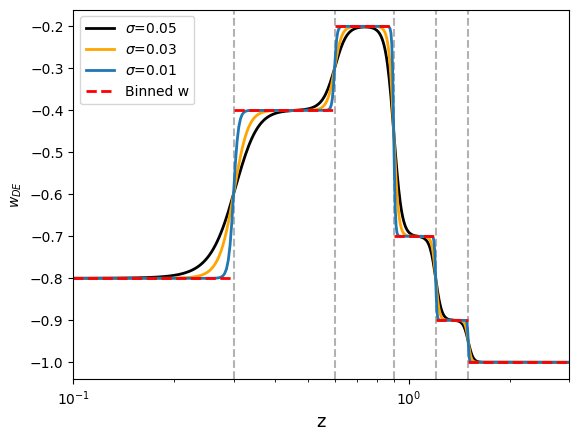

In [5]:
[plt.axvline(x=zs_5bins[i],c="black",ls="--",alpha=.3) for i in range(5)]

colors = ["black", "orange", "C0"]

for sigma,color in zip(sigmas,colors):
    rho_SumTanh, w_SumTanh, SumTanh_results = w_rho_res_SumTanh(sigma)
    plt.semilogx(redshift, w_SumTanh, lw=2, label=r"$\sigma$={}".format(sigma),color=color)

[plt.hlines(y=y[i],xmin=x[i],xmax=x[i+1],color="red",ls='--',lw=2, label=("Binned w" if i==0 else None)) for i in range(6)]
plt.legend(loc="best")
plt.xlabel("z",fontsize=fontsize)
plt.ylabel(r"$w_{DE}$")
plt.xlim(1e-1,3e0)

Text(0, 0.5, '$\\rho_{Binned}$ / $\\rho_{Transition}$-1')

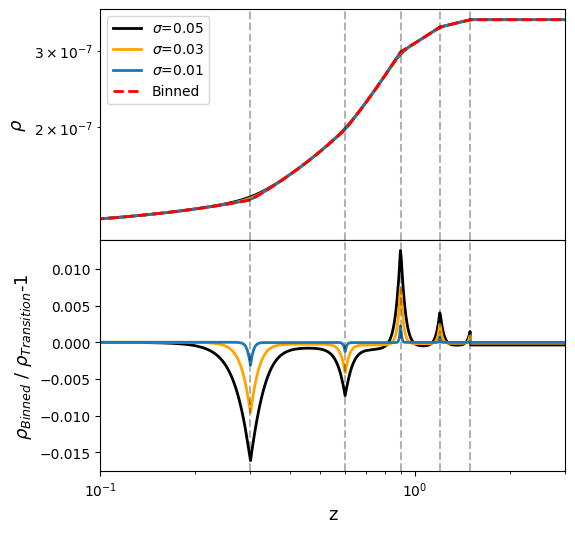

In [6]:
f,ax = plt.subplots(2, 1, figsize=(6, 6),sharex=True)
f.subplots_adjust(hspace=0)

for sigma,color in zip(sigmas,colors):
    rho_SumTanh, w_SumTanh, SumTanh_results = w_rho_res_SumTanh(sigma)
    ax[0].loglog(redshift,rho_SumTanh, lw=2, label=r"$\sigma$={}".format(sigma),color=color)
ax[0].loglog(redshift,rho_Binned5, lw=2, color="red",ls='--',label="Binned")
ax[0].set_ylabel(r"$\rho$",fontsize=fontsize)
ax[0].legend(loc="best")
ax[0].set_xlim(1e-1,3e0)

for sigma,color in zip(sigmas,colors):
    rho_SumTanh, w_SumTanh, SumTanh_results = w_rho_res_SumTanh(sigma)
    ax[1].semilogx(redshift,rho_Binned5/rho_SumTanh-1, lw=2, label=r"$\sigma$={}".format(sigma),color=color)
ax[1].set_xlim(1e-1,3e0)
ax[1].set_xlabel("z",fontsize=fontsize)
[ax[0].axvline(x=zs_5bins[i],c="black",ls="--",alpha=.3) for i in range(5)]
[ax[1].axvline(x=zs_5bins[i],c="black",ls="--",alpha=.3) for i in range(5)]
plt.ylabel(r"$\rho_{Binned}$ / $\rho_{Transition}$-1",fontsize=fontsize)

In [7]:
cls_Binned5 = Binned5_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
ells = [i for i in range(len(cls_Binned5))]

/tmp/ipykernel_3428495/2394714509.py:13: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(ells, cls_Binned5/cls_SumTanh-1, color=color)


Text(0.5, 0, '$\\ell$')

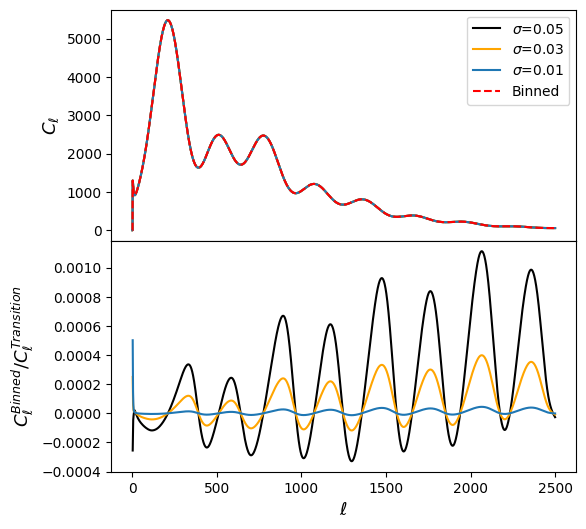

In [8]:
f,ax = plt.subplots(2, 1, figsize=(6, 6),sharex=True)
f.subplots_adjust(hspace=0)

for sigma,color in zip(sigmas,colors):
    rho_SumTanh, w_SumTanh, SumTanh_results = w_rho_res_SumTanh(sigma)
    cls_SumTanh = SumTanh_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
    ax[0].plot(ells, cls_SumTanh, color=color, label=r"$\sigma$={}".format(sigma))
ax[0].plot(ells, cls_Binned5, color="red",ls="--",label="Binned")

for sigma,color in zip(sigmas,colors):
    rho_SumTanh, w_SumTanh, SumTanh_results = w_rho_res_SumTanh(sigma)
    cls_SumTanh = SumTanh_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
    ax[1].plot(ells, cls_Binned5/cls_SumTanh-1, color=color)

ax[0].legend(loc="best")
ax[0].set_ylabel(r"$C_\ell$",fontsize=fontsize)
ax[1].set_ylabel(r"$C_\ell^{Binned} / C_\ell^{Transition}$",fontsize=fontsize)
ax[1].set_xlabel(r"$\ell$",fontsize=fontsize)